<a href="https://colab.research.google.com/github/dhruv0x0x0/pclubsecytaskML/blob/main/CNNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.09998469 0.09999459 0.10001381 0.09998998 0.10001924 0.09999643
 0.10001529 0.10000661 0.09998242 0.09999693]
Epoch 1 ---->
step
0.01
avg loss: 
0.0
accuracy
0


step
1.01
avg loss: 
2.2887772123197436
accuracy
17


step
2.01
avg loss: 
2.1732990259359894
accuracy
32


step
3.01
avg loss: 
1.962889091822156
accuracy
40


step
4.01
avg loss: 
1.4981951857432734
accuracy
54


step
5.01
avg loss: 
1.342760403916806
accuracy
60


step
6.01
avg loss: 
0.9638222490940754
accuracy
72


step
7.01
avg loss: 
0.8561324323574508
accuracy
74


step
8.01
avg loss: 
0.9075732464562275
accuracy
71


step
9.01
avg loss: 
0.5960440102333628
accuracy
83


step
10.01
avg loss: 
0.7338578662357784
accuracy
76


step
11.01
avg loss: 
0.6847452067865418
accuracy
80


step
12.01
avg loss: 
0.7563600377091325
accuracy
74


step
13.01
avg loss: 
0.5271790819435048
accuracy
80


step
14.01
avg loss: 
0.4863712969992675
accuracy
84


step
15.01
avg loss: 
0.3736034200969239
accuracy
91


step
16.01
avg loss: 

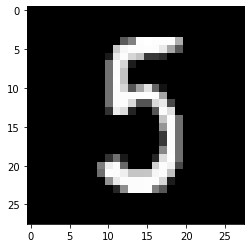

(28, 28)
image is probably 5


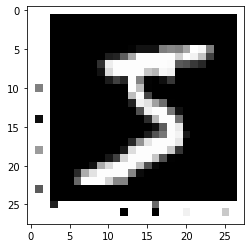

(28, 28)
image is probably 7


In [31]:
from matplotlib import image
import matplotlib.pyplot as plt
import cv2
from numpy import asarray
import numpy as np
import tensorflow as tf
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.mnist.load_data()





#Filter Array size-nxn, conv filter nfxnxn
class Convulation:
    def __init__(self, nf, n):
        self.nf = nf
        self.n = n
        self.filter = np.random.randn(nf, n, n)/(n*n) #will initial a normalized 3D matrix with random numbers

    def patch(self, img):
        h, w= img.shape
        self.img = img
        for i in range(h-self.n+1):
          for j in range(w-self.n+1):
            img_patch=img[i:i+self.n,j:j+self.n]
            yield img_patch, i, j

    def fwdprop(self, img):
        h, w= img.shape  
        Convulation_output = np.zeros((h-self.n + 1, w - self.n + 1, self.nf))
        for img_patch, i, j in self.patch(img):
            Convulation_output[i, j] = np.sum(img_patch*self.filter, axis=(1, 2))
        return Convulation_output

    def backprop(self, dL_dout, lrate):
        dl_dF_params = np.zeros(self.filter.shape)
        for img_patch, i, j in self.patch(self.img):
            for k in range(self.n):
                dl_dF_params[k] += img_patch*dL_dout[i, j, k]
        self.filter -= lrate*dl_dF_params
        return dl_dF_params    
"""      
conn = Convulation(18, 7)
out = conn.fwdprop(img)
print(out.shape)
plt.imshow(out[:, :, 17], cmap='gray')
plt.show()
"""
class Max_Pool:
    def __init__(self, n):
         self.n=n
    def patch(self, img):     
      h2= img.shape[0] // self.n
      w2= img.shape[1] // self.n
      self.img=img
      
      for i in range(h2):
        for j in range(w2):
          img_patch=img[(i*self.n): (i*self.n+self.n),(j*self.n): (j*self.n+self.n),]
          yield img_patch, i, j

    def fwd_prop(self,img):
      h, w, nf=img.shape
      output=np.zeros((h // self.n, w // self.n, nf)) 
      for img_patch,i,j in self.patch(img):
        output[i,j]=np.amax(img_patch,axis=(0,1))
      return output

    def back_prop(self, dL_dout):
      dL_dmax_pool=np.zeros(self.img.shape)
      for img_patch, i, j, in self.patch(self.img):
        h, w, nf=img_patch.shape
        maximum_val=np.amax(img_patch,axis=(0,1))

        for i1 in range(h):
         for j1 in range(w):
           for k1 in range(nf):
             if img_patch[i1, j1, k1]== maximum_val[k1]:
               dL_dmax_pool[i*self.n+i1, j*self.n+j1, k1]=dL_dout[i,j,k1]
      return dL_dmax_pool    


"""
conn2= Max_Pool(4)
out2= conn2.fwd_prop(out)
print(out2.shape)
plt.imshow(out2[:, :, 17], cmap='gray')
plt.show()  
"""
class Softmax:
  def __init__(self, input_node, softmax_node):
    self.weight=np.random.randn(input_node,softmax_node)/input_node
    self.bias=np.zeros(softmax_node)

  def forward_prop(self,image):
    self.orig_im_shape=image.shape
    image_modified=image.flatten()
    self.modified_input=image_modified
    output_val = np.dot(image_modified, self.weight) + self.bias
    self.out=output_val
    exp_out=np.exp(output_val)
    return exp_out/np.sum(exp_out, axis=0)

  def back_prop(self, dL_dout, learning_rate):
    for i,grad in enumerate(dL_dout):
      if grad==0:
        continue

      transformation_eq=np.exp(self.out)
      S_total=np.sum(transformation_eq)

      dy_dz=-transformation_eq[i]* transformation_eq/(S_total**2)
      dy_dz[i]=transformation_eq[i]*(S_total-transformation_eq[i])/(S_total**2)

      dz_dw=self.modified_input
      dz_db=1
      dz_d_inp=self.weight
      dL_dz=grad*dy_dz
      dL_dw=dz_dw[np.newaxis].T @ dL_dz[np.newaxis]
      dL_db=dL_dz*dz_db
      dL_d_inp=dz_d_inp @ dL_dz
      self.weight-= learning_rate* dL_dw      
      self.bias-= learning_rate* dL_db     

      return dL_d_inp.reshape(self.orig_im_shape) 
class Softmax:
  def __init__(self, input_node, softmax_node):
    self.weight=np.random.randn(input_node,softmax_node)/input_node
    self.bias=np.zeros(softmax_node)

  def fwd_prop(self,image):
    self.orig_im_shape=image.shape
    image_modified=image.flatten()
    self.modified_input=image_modified
    output_val = np.dot(image_modified, self.weight) + self.bias
    self.out=output_val
    exp_out=np.exp(output_val)
    return exp_out/np.sum(exp_out, axis=0)

  def back_prop(self, dL_dout, learning_rate):
    for i,grad in enumerate(dL_dout):
      if grad==0:
        continue

      transformation_eq=np.exp(self.out)
      S_total=np.sum(transformation_eq)

      dy_dz=-transformation_eq[i]* transformation_eq/(S_total**2)
      dy_dz[i]=transformation_eq[i]*(S_total-transformation_eq[i])/(S_total**2)

      dz_dw=self.modified_input
      dz_db=1
      dz_d_inp=self.weight
      dL_dz=grad*dy_dz
      dL_dw=dz_dw[np.newaxis].T @ dL_dz[np.newaxis]
      dL_db=dL_dz*dz_db
      dL_d_inp=dz_d_inp @ dL_dz
      self.weight-= learning_rate* dL_dw      
      self.bias-= learning_rate* dL_db     

      return dL_d_inp.reshape(self.orig_im_shape) 

conn3=Softmax(18*393*268, 10)
out3=conn3.fwd_prop(out2)
print(out3)
x=6900
train_images= X_train[:x]
train_labels= Y_train[:x]
test_images= X_test[:x]
test_labels= Y_test[:x]
conv=Convulation(8,3)
pool=Max_Pool(2)
softmax=Softmax(13*13*8,10)

def cnn_forward_prop(image, label):
  out_p= conv.fwdprop((image/255)-0.5)
  out_p= pool.fwd_prop(out_p)
  out_p=softmax.fwd_prop(out_p)
  cross_ent_loss=-np.log(out_p[label]) if out_p[label]>0 else 0
  accuracy_eval=1 if np.argmax(out_p) == label else 0
  return out_p, cross_ent_loss, accuracy_eval

def training_cnn(image, label, learn_rate=0.005):
  out, loss, acc= cnn_forward_prop(image,label) 
  gradient= np.zeros(10)
  gradient[label]=-1/out[label]

  grad_back=softmax.back_prop(gradient, learn_rate)
  grad_back= pool.back_prop(grad_back)
  grad_back= conv.backprop(grad_back,learn_rate)

  return loss, acc  
for epoch1 in range(4):
  print('Epoch %d ---->' % (epoch1+1))

  shuffle_data=np.random.permutation(len(train_images))
  train_images=train_images[shuffle_data]
  train_labels=train_labels[shuffle_data]

  loss=0
  num_correct=0
  for i, (im,label) in enumerate(zip(train_images,train_labels)):
    if i % 100 ==0:
    
      print('step')
      print((i+1)/100)
      print('avg loss: ')
      print(loss/100)
      print('accuracy')
      print(num_correct)
      print('\n')
      loss=0
      num_correct=0
    l1,accu=training_cnn(im, label)
    loss+=l1
    num_correct+=accu
print('*TestingPhase*')
loss=0
num_correct=0
for im,label in zip(test_images,test_labels):
  _, l1, accu=cnn_forward_prop(im, label)
  loss+=l1
  num_correct+=accu
num_tests=len(test_images)

print('Loss:', loss/num_tests) 
print('Accuracy:',num_correct/num_tests)


y=69
plt.imshow(train_images[y], cmap='gray')
plt.show()
print(train_images[y].shape)
out_p= conv.fwdprop((train_images[y]/255)-0.5)
out_p= pool.fwd_prop(out_p)
out_p=softmax.fwd_prop(out_p)
print("image is probably",np.argmax(out_p))
"""
img = cv2.imread('/content/sample_data/5.png', cv2.IMREAD_GRAYSCALE)/255
def predict(img1):
  img = cv2.resize(img1, (28, 28))
  plt.imshow(img, cmap='gray')
  plt.show()
  print(img.shape)
  out_p= conv.fwdprop((img/255)-0.5)
  out_p= pool.fwd_prop(out_p)
  out_p=softmax.fwd_prop(out_p)
  print("image is probably",np.argmax(out_p))
predict(img)
"""